### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read files

In [2]:
epex_df = pd.read_csv("epex_day_ahead_price.csv")
spot_df = pd.read_csv("spot_intraday_price.csv")
system_df = pd.read_csv("systemprice.csv")

# 1. Inspect Datasets and fix errors

### Epex Prices

In [3]:
epex_df.head(3)

,timestamp,apx_da_hourly
0,2019-03-31 23:00:00+00:00,26.43
1,2019-03-31 23:30:00+00:00,26.43
2,2019-04-01 00:00:00+00:00,29.24


Get rid of first and last dates to match with other dataframes

In [4]:
epex_df = epex_df.iloc[338:-336].copy()
epex_df.head(3)

,timestamp,apx_da_hourly
338,2019-04-08 00:00:00+00:00,33.41
339,2019-04-08 00:30:00+00:00,33.41
340,2019-04-08 01:00:00+00:00,41.03


In [5]:
epex_df.describe()

,apx_da_hourly
count,47184.000000
mean,63.408615
std,65.787193
min,-38.800000
25%,33.100000
50%,44.300000
75%,68.000000
max,1860.000000


Check if there are any nan values

In [6]:
epex_df.isnull().values.any()

False

### Spot Prices

In [7]:
spot_df.head(3)

,timestamp,SP,spot_price
0,2019-01-02 00:00:00+00:00,1.0,40.01
1,2019-01-02 00:30:00+00:00,2.0,43.27
2,2019-01-02 01:00:00+00:00,3.0,42.72


Get rid of first and last dates to match with other dataframes

In [8]:
spot_df = spot_df.iloc[4608:-48].copy()
spot_df.head(3)

,timestamp,SP,spot_price
4608,2019-04-08 00:00:00+00:00,3.0,40.45
4609,2019-04-08 00:30:00+00:00,4.0,43.69
4610,2019-04-08 01:00:00+00:00,5.0,46.13


In [9]:
spot_df.describe()

,SP,spot_price
count,46810.000000,46810.000000
mean,24.508182,60.966664
std,13.851154,68.274426
min,1.000000,-101.620000
25%,13.000000,31.510000
50%,25.000000,43.470000
75%,37.000000,68.487500
max,48.000000,2975.060000


##### There seems to be something wrong wth the SP column, there is no need to deal with this now as we will merge datasets and use the other, correct SP column

Check if there are any nan values

In [10]:
spot_df.isnull().values.any()

True

Replace missing values with median, not mean - because the data is very skewed

In [11]:
spot_df.fillna(value = spot_df["spot_price"].median(),inplace=True)
spot_df.isnull().values.any()

False

### System Prices

In [12]:
system_df.head(3)

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
0,08/04/2019,1,52.25,52.25,195.4258
1,08/04/2019,2,51.90,51.90,62.2486
2,08/04/2019,3,32.76,32.76,-40.7968


Check if there are any nan values

In [13]:
system_df.isnull().values.any()

False

### Deal with the extra data in the system prices dataset

##### Row count does not match the others. Inspect:

In [14]:
system_df["Settlement Period"].value_counts()

1     983
36    983
27    983
28    983
29    983
30    983
31    983
32    983
33    983
34    983
35    983
37    983
25    983
38    983
39    983
40    983
41    983
42    983
43    983
44    983
45    983
46    983
2     983
26    983
24    983
12    983
3     983
4     983
5     983
6     983
7     983
8     983
9     983
10    983
23    983
11    983
13    983
14    983
15    983
16    983
17    983
18    983
19    983
20    983
21    983
22    983
47    981
48    981
49      3
50      3
Name: Settlement Period, dtype: int64

Seems there is some extra and missing data

In [15]:
system_df.loc[ system_df["Settlement Period"] == 49]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
9744,27/10/2019,49,17.00,17.00,-79.4619
27216,25/10/2020,49,17.34,17.34,-477.2735
45024,31/10/2021,49,16.90,16.90,-424.3871


In [16]:
system_df.loc[ system_df["Settlement Period"] == 50]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
9745,27/10/2019,50,45.00,45.00,105.5561
27217,25/10/2020,50,14.71,14.71,-760.7069
45025,31/10/2021,50,16.90,16.90,-444.9254


In [17]:
system_df.iloc[9740:9750]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
9740,27/10/2019,45,58.92796,58.92796,290.9965
9741,27/10/2019,46,16.25000,16.25000,-84.4829
9742,27/10/2019,47,48.50000,48.50000,376.2955
9743,27/10/2019,48,47.50000,47.50000,247.2096
9744,27/10/2019,49,17.00000,17.00000,-79.4619
9745,27/10/2019,50,45.00000,45.00000,105.5561
9746,28/10/2019,1,22.66000,22.66000,-342.0250
9747,28/10/2019,2,24.06000,24.06000,-212.9334
9748,28/10/2019,3,24.34000,24.34000,-117.4583
9749,28/10/2019,4,22.17000,22.17000,-277.2544


In [18]:
system_df.iloc[27210:27220]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
27210,25/10/2020,43,2.20,2.20,-603.6744
27211,25/10/2020,44,18.00,18.00,-534.3983
27212,25/10/2020,45,20.20,20.20,-967.2610
27213,25/10/2020,46,3.95,3.95,-842.2514
27214,25/10/2020,47,20.86,20.86,-603.4282
27215,25/10/2020,48,5.00,5.00,-1016.4918
27216,25/10/2020,49,17.34,17.34,-477.2735
27217,25/10/2020,50,14.71,14.71,-760.7069
27218,26/10/2020,1,13.12,13.12,-716.9055
27219,26/10/2020,2,15.09,15.09,-330.1523


In [19]:
system_df.iloc[45020:45030]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
45020,31/10/2021,45,175.00,175.00,341.7950
45021,31/10/2021,46,76.00,76.00,-25.3079
45022,31/10/2021,47,30.92,30.92,-357.9742
45023,31/10/2021,48,0.00,0.00,-616.3338
45024,31/10/2021,49,16.90,16.90,-424.3871
45025,31/10/2021,50,16.90,16.90,-444.9254
45026,01/11/2021,1,0.00,0.00,-516.4873
45027,01/11/2021,2,1.00,1.00,-436.4728
45028,01/11/2021,3,-3.44,-3.44,-424.9166
45029,01/11/2021,4,-8.52,-8.52,-529.8139


#### Drop the aforementioned rows

In [20]:
system_df_copy = system_df.copy()

In [21]:
system_df_copy.drop([9744,9745,27216,27217,45024,45025], inplace=True)

In [22]:
system_df_copy.reset_index(inplace=True)
system_df_copy.drop("index", axis=1,inplace=True)

In [23]:
system_df_copy.head(3)

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
0,08/04/2019,1,52.25,52.25,195.4258
1,08/04/2019,2,51.90,51.90,62.2486
2,08/04/2019,3,32.76,32.76,-40.7968


##### Loop to find anamolous rows

In [24]:
k = 0
for i in range(system_df_copy.shape[0]):
    k += 1
    if system_df_copy["Settlement Period"][i] != k:
        print(k, system_df_copy["Settlement Period"][i], i)
        break
    if k == 48:
        k = 0


47 1 17134


In [25]:
system_df_copy.iloc[17130:17138]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
17130,29/03/2020,43,38.50,38.50,21.5250
17131,29/03/2020,44,39.25,39.25,170.9372
17132,29/03/2020,45,41.80,41.80,482.7865
17133,29/03/2020,46,41.80,41.80,383.3224
17134,30/03/2020,1,39.00,39.00,203.3983
17135,30/03/2020,2,19.20,19.20,-1.8051
17136,30/03/2020,3,19.19,19.19,-106.6651
17137,30/03/2020,4,38.25,38.25,176.6504


In [26]:
k = 0
for i in range(17134,system_df_copy.shape[0]):
    k += 1
    if system_df_copy["Settlement Period"][i] != k:
        print(k, system_df_copy["Settlement Period"][i], i)
    if k == 48:
        k = 0


47 1 34604
48 2 34605
1 3 34606
2 4 34607
3 5 34608
4 6 34609
5 7 34610
6 8 34611
7 9 34612
8 10 34613
9 11 34614
10 12 34615
11 13 34616
12 14 34617
13 15 34618
14 16 34619
15 17 34620
16 18 34621
17 19 34622
18 20 34623
19 21 34624
20 22 34625
21 23 34626
22 24 34627
23 25 34628
24 26 34629
25 27 34630
26 28 34631
27 29 34632
28 30 34633
29 31 34634
30 32 34635
31 33 34636
32 34 34637
33 35 34638
34 36 34639
35 37 34640
36 38 34641
37 39 34642
38 40 34643
39 41 34644
40 42 34645
41 43 34646
42 44 34647
43 45 34648
44 46 34649
45 47 34650
46 48 34651
47 1 34652
48 2 34653
1 3 34654
2 4 34655
3 5 34656
4 6 34657
5 7 34658
6 8 34659
7 9 34660
8 10 34661
9 11 34662
10 12 34663
11 13 34664
12 14 34665
13 15 34666
14 16 34667
15 17 34668
16 18 34669
17 19 34670
18 20 34671
19 21 34672
20 22 34673
21 23 34674
22 24 34675
23 25 34676
24 26 34677
25 27 34678
26 28 34679
27 29 34680
28 30 34681
29 31 34682
30 32 34683
31 33 34684
32 34 34685
33 35 34686
34 36 34687
35 37 34688
36 38 34689
37 3

10 12 35479
11 13 35480
12 14 35481
13 15 35482
14 16 35483
15 17 35484
16 18 35485
17 19 35486
18 20 35487
19 21 35488
20 22 35489
21 23 35490
22 24 35491
23 25 35492
24 26 35493
25 27 35494
26 28 35495
27 29 35496
28 30 35497
29 31 35498
30 32 35499
31 33 35500
32 34 35501
33 35 35502
34 36 35503
35 37 35504
36 38 35505
37 39 35506
38 40 35507
39 41 35508
40 42 35509
41 43 35510
42 44 35511
43 45 35512
44 46 35513
45 47 35514
46 48 35515
47 1 35516
48 2 35517
1 3 35518
2 4 35519
3 5 35520
4 6 35521
5 7 35522
6 8 35523
7 9 35524
8 10 35525
9 11 35526
10 12 35527
11 13 35528
12 14 35529
13 15 35530
14 16 35531
15 17 35532
16 18 35533
17 19 35534
18 20 35535
19 21 35536
20 22 35537
21 23 35538
22 24 35539
23 25 35540
24 26 35541
25 27 35542
26 28 35543
27 29 35544
28 30 35545
29 31 35546
30 32 35547
31 33 35548
32 34 35549
33 35 35550
34 36 35551
35 37 35552
36 38 35553
37 39 35554
38 40 35555
39 41 35556
40 42 35557
41 43 35558
42 44 35559
43 45 35560
44 46 35561
45 47 35562
46 48 3556

16 18 36445
17 19 36446
18 20 36447
19 21 36448
20 22 36449
21 23 36450
22 24 36451
23 25 36452
24 26 36453
25 27 36454
26 28 36455
27 29 36456
28 30 36457
29 31 36458
30 32 36459
31 33 36460
32 34 36461
33 35 36462
34 36 36463
35 37 36464
36 38 36465
37 39 36466
38 40 36467
39 41 36468
40 42 36469
41 43 36470
42 44 36471
43 45 36472
44 46 36473
45 47 36474
46 48 36475
47 1 36476
48 2 36477
1 3 36478
2 4 36479
3 5 36480
4 6 36481
5 7 36482
6 8 36483
7 9 36484
8 10 36485
9 11 36486
10 12 36487
11 13 36488
12 14 36489
13 15 36490
14 16 36491
15 17 36492
16 18 36493
17 19 36494
18 20 36495
19 21 36496
20 22 36497
21 23 36498
22 24 36499
23 25 36500
24 26 36501
25 27 36502
26 28 36503
27 29 36504
28 30 36505
29 31 36506
30 32 36507
31 33 36508
32 34 36509
33 35 36510
34 36 36511
35 37 36512
36 38 36513
37 39 36514
38 40 36515
39 41 36516
40 42 36517
41 43 36518
42 44 36519
43 45 36520
44 46 36521
45 47 36522
46 48 36523
47 1 36524
48 2 36525
1 3 36526
2 4 36527
3 5 36528
4 6 36529
5 7 3653

26 28 37415
27 29 37416
28 30 37417
29 31 37418
30 32 37419
31 33 37420
32 34 37421
33 35 37422
34 36 37423
35 37 37424
36 38 37425
37 39 37426
38 40 37427
39 41 37428
40 42 37429
41 43 37430
42 44 37431
43 45 37432
44 46 37433
45 47 37434
46 48 37435
47 1 37436
48 2 37437
1 3 37438
2 4 37439
3 5 37440
4 6 37441
5 7 37442
6 8 37443
7 9 37444
8 10 37445
9 11 37446
10 12 37447
11 13 37448
12 14 37449
13 15 37450
14 16 37451
15 17 37452
16 18 37453
17 19 37454
18 20 37455
19 21 37456
20 22 37457
21 23 37458
22 24 37459
23 25 37460
24 26 37461
25 27 37462
26 28 37463
27 29 37464
28 30 37465
29 31 37466
30 32 37467
31 33 37468
32 34 37469
33 35 37470
34 36 37471
35 37 37472
36 38 37473
37 39 37474
38 40 37475
39 41 37476
40 42 37477
41 43 37478
42 44 37479
43 45 37480
44 46 37481
45 47 37482
46 48 37483
47 1 37484
48 2 37485
1 3 37486
2 4 37487
3 5 37488
4 6 37489
5 7 37490
6 8 37491
7 9 37492
8 10 37493
9 11 37494
10 12 37495
11 13 37496
12 14 37497
13 15 37498
14 16 37499
15 17 37500
16 1

4 6 38353
5 7 38354
6 8 38355
7 9 38356
8 10 38357
9 11 38358
10 12 38359
11 13 38360
12 14 38361
13 15 38362
14 16 38363
15 17 38364
16 18 38365
17 19 38366
18 20 38367
19 21 38368
20 22 38369
21 23 38370
22 24 38371
23 25 38372
24 26 38373
25 27 38374
26 28 38375
27 29 38376
28 30 38377
29 31 38378
30 32 38379
31 33 38380
32 34 38381
33 35 38382
34 36 38383
35 37 38384
36 38 38385
37 39 38386
38 40 38387
39 41 38388
40 42 38389
41 43 38390
42 44 38391
43 45 38392
44 46 38393
45 47 38394
46 48 38395
47 1 38396
48 2 38397
1 3 38398
2 4 38399
3 5 38400
4 6 38401
5 7 38402
6 8 38403
7 9 38404
8 10 38405
9 11 38406
10 12 38407
11 13 38408
12 14 38409
13 15 38410
14 16 38411
15 17 38412
16 18 38413
17 19 38414
18 20 38415
19 21 38416
20 22 38417
21 23 38418
22 24 38419
23 25 38420
24 26 38421
25 27 38422
26 28 38423
27 29 38424
28 30 38425
29 31 38426
30 32 38427
31 33 38428
32 34 38429
33 35 38430
34 36 38431
35 37 38432
36 38 38433
37 39 38434
38 40 38435
39 41 38436
40 42 38437
41 43 38

13 15 39274
14 16 39275
15 17 39276
16 18 39277
17 19 39278
18 20 39279
19 21 39280
20 22 39281
21 23 39282
22 24 39283
23 25 39284
24 26 39285
25 27 39286
26 28 39287
27 29 39288
28 30 39289
29 31 39290
30 32 39291
31 33 39292
32 34 39293
33 35 39294
34 36 39295
35 37 39296
36 38 39297
37 39 39298
38 40 39299
39 41 39300
40 42 39301
41 43 39302
42 44 39303
43 45 39304
44 46 39305
45 47 39306
46 48 39307
47 1 39308
48 2 39309
1 3 39310
2 4 39311
3 5 39312
4 6 39313
5 7 39314
6 8 39315
7 9 39316
8 10 39317
9 11 39318
10 12 39319
11 13 39320
12 14 39321
13 15 39322
14 16 39323
15 17 39324
16 18 39325
17 19 39326
18 20 39327
19 21 39328
20 22 39329
21 23 39330
22 24 39331
23 25 39332
24 26 39333
25 27 39334
26 28 39335
27 29 39336
28 30 39337
29 31 39338
30 32 39339
31 33 39340
32 34 39341
33 35 39342
34 36 39343
35 37 39344
36 38 39345
37 39 39346
38 40 39347
39 41 39348
40 42 39349
41 43 39350
42 44 39351
43 45 39352
44 46 39353
45 47 39354
46 48 39355
47 1 39356
48 2 39357
1 3 39358
2 

29 31 40298
30 32 40299
31 33 40300
32 34 40301
33 35 40302
34 36 40303
35 37 40304
36 38 40305
37 39 40306
38 40 40307
39 41 40308
40 42 40309
41 43 40310
42 44 40311
43 45 40312
44 46 40313
45 47 40314
46 48 40315
47 1 40316
48 2 40317
1 3 40318
2 4 40319
3 5 40320
4 6 40321
5 7 40322
6 8 40323
7 9 40324
8 10 40325
9 11 40326
10 12 40327
11 13 40328
12 14 40329
13 15 40330
14 16 40331
15 17 40332
16 18 40333
17 19 40334
18 20 40335
19 21 40336
20 22 40337
21 23 40338
22 24 40339
23 25 40340
24 26 40341
25 27 40342
26 28 40343
27 29 40344
28 30 40345
29 31 40346
30 32 40347
31 33 40348
32 34 40349
33 35 40350
34 36 40351
35 37 40352
36 38 40353
37 39 40354
38 40 40355
39 41 40356
40 42 40357
41 43 40358
42 44 40359
43 45 40360
44 46 40361
45 47 40362
46 48 40363
47 1 40364
48 2 40365
1 3 40366
2 4 40367
3 5 40368
4 6 40369
5 7 40370
6 8 40371
7 9 40372
8 10 40373
9 11 40374
10 12 40375
11 13 40376
12 14 40377
13 15 40378
14 16 40379
15 17 40380
16 18 40381
17 19 40382
18 20 40383
19 2

31 33 41164
32 34 41165
33 35 41166
34 36 41167
35 37 41168
36 38 41169
37 39 41170
38 40 41171
39 41 41172
40 42 41173
41 43 41174
42 44 41175
43 45 41176
44 46 41177
45 47 41178
46 48 41179
47 1 41180
48 2 41181
1 3 41182
2 4 41183
3 5 41184
4 6 41185
5 7 41186
6 8 41187
7 9 41188
8 10 41189
9 11 41190
10 12 41191
11 13 41192
12 14 41193
13 15 41194
14 16 41195
15 17 41196
16 18 41197
17 19 41198
18 20 41199
19 21 41200
20 22 41201
21 23 41202
22 24 41203
23 25 41204
24 26 41205
25 27 41206
26 28 41207
27 29 41208
28 30 41209
29 31 41210
30 32 41211
31 33 41212
32 34 41213
33 35 41214
34 36 41215
35 37 41216
36 38 41217
37 39 41218
38 40 41219
39 41 41220
40 42 41221
41 43 41222
42 44 41223
43 45 41224
44 46 41225
45 47 41226
46 48 41227
47 1 41228
48 2 41229
1 3 41230
2 4 41231
3 5 41232
4 6 41233
5 7 41234
6 8 41235
7 9 41236
8 10 41237
9 11 41238
10 12 41239
11 13 41240
12 14 41241
13 15 41242
14 16 41243
15 17 41244
16 18 41245
17 19 41246
18 20 41247
19 21 41248
20 22 41249
21 2

2 4 41999
3 5 42000
4 6 42001
5 7 42002
6 8 42003
7 9 42004
8 10 42005
9 11 42006
10 12 42007
11 13 42008
12 14 42009
13 15 42010
14 16 42011
15 17 42012
16 18 42013
17 19 42014
18 20 42015
19 21 42016
20 22 42017
21 23 42018
22 24 42019
23 25 42020
24 26 42021
25 27 42022
26 28 42023
27 29 42024
28 30 42025
29 31 42026
30 32 42027
31 33 42028
32 34 42029
33 35 42030
34 36 42031
35 37 42032
36 38 42033
37 39 42034
38 40 42035
39 41 42036
40 42 42037
41 43 42038
42 44 42039
43 45 42040
44 46 42041
45 47 42042
46 48 42043
47 1 42044
48 2 42045
1 3 42046
2 4 42047
3 5 42048
4 6 42049
5 7 42050
6 8 42051
7 9 42052
8 10 42053
9 11 42054
10 12 42055
11 13 42056
12 14 42057
13 15 42058
14 16 42059
15 17 42060
16 18 42061
17 19 42062
18 20 42063
19 21 42064
20 22 42065
21 23 42066
22 24 42067
23 25 42068
24 26 42069
25 27 42070
26 28 42071
27 29 42072
28 30 42073
29 31 42074
30 32 42075
31 33 42076
32 34 42077
33 35 42078
34 36 42079
35 37 42080
36 38 42081
37 39 42082
38 40 42083
39 41 42084


16 18 42925
17 19 42926
18 20 42927
19 21 42928
20 22 42929
21 23 42930
22 24 42931
23 25 42932
24 26 42933
25 27 42934
26 28 42935
27 29 42936
28 30 42937
29 31 42938
30 32 42939
31 33 42940
32 34 42941
33 35 42942
34 36 42943
35 37 42944
36 38 42945
37 39 42946
38 40 42947
39 41 42948
40 42 42949
41 43 42950
42 44 42951
43 45 42952
44 46 42953
45 47 42954
46 48 42955
47 1 42956
48 2 42957
1 3 42958
2 4 42959
3 5 42960
4 6 42961
5 7 42962
6 8 42963
7 9 42964
8 10 42965
9 11 42966
10 12 42967
11 13 42968
12 14 42969
13 15 42970
14 16 42971
15 17 42972
16 18 42973
17 19 42974
18 20 42975
19 21 42976
20 22 42977
21 23 42978
22 24 42979
23 25 42980
24 26 42981
25 27 42982
26 28 42983
27 29 42984
28 30 42985
29 31 42986
30 32 42987
31 33 42988
32 34 42989
33 35 42990
34 36 42991
35 37 42992
36 38 42993
37 39 42994
38 40 42995
39 41 42996
40 42 42997
41 43 42998
42 44 42999
43 45 43000
44 46 43001
45 47 43002
46 48 43003
47 1 43004
48 2 43005
1 3 43006
2 4 43007
3 5 43008
4 6 43009
5 7 4301

20 22 43889
21 23 43890
22 24 43891
23 25 43892
24 26 43893
25 27 43894
26 28 43895
27 29 43896
28 30 43897
29 31 43898
30 32 43899
31 33 43900
32 34 43901
33 35 43902
34 36 43903
35 37 43904
36 38 43905
37 39 43906
38 40 43907
39 41 43908
40 42 43909
41 43 43910
42 44 43911
43 45 43912
44 46 43913
45 47 43914
46 48 43915
47 1 43916
48 2 43917
1 3 43918
2 4 43919
3 5 43920
4 6 43921
5 7 43922
6 8 43923
7 9 43924
8 10 43925
9 11 43926
10 12 43927
11 13 43928
12 14 43929
13 15 43930
14 16 43931
15 17 43932
16 18 43933
17 19 43934
18 20 43935
19 21 43936
20 22 43937
21 23 43938
22 24 43939
23 25 43940
24 26 43941
25 27 43942
26 28 43943
27 29 43944
28 30 43945
29 31 43946
30 32 43947
31 33 43948
32 34 43949
33 35 43950
34 36 43951
35 37 43952
36 38 43953
37 39 43954
38 40 43955
39 41 43956
40 42 43957
41 43 43958
42 44 43959
43 45 43960
44 46 43961
45 47 43962
46 48 43963
47 1 43964
48 2 43965
1 3 43966
2 4 43967
3 5 43968
4 6 43969
5 7 43970
6 8 43971
7 9 43972
8 10 43973
9 11 43974
10 1

33 35 44814
34 36 44815
35 37 44816
36 38 44817
37 39 44818
38 40 44819
39 41 44820
40 42 44821
41 43 44822
42 44 44823
43 45 44824
44 46 44825
45 47 44826
46 48 44827
47 1 44828
48 2 44829
1 3 44830
2 4 44831
3 5 44832
4 6 44833
5 7 44834
6 8 44835
7 9 44836
8 10 44837
9 11 44838
10 12 44839
11 13 44840
12 14 44841
13 15 44842
14 16 44843
15 17 44844
16 18 44845
17 19 44846
18 20 44847
19 21 44848
20 22 44849
21 23 44850
22 24 44851
23 25 44852
24 26 44853
25 27 44854
26 28 44855
27 29 44856
28 30 44857
29 31 44858
30 32 44859
31 33 44860
32 34 44861
33 35 44862
34 36 44863
35 37 44864
36 38 44865
37 39 44866
38 40 44867
39 41 44868
40 42 44869
41 43 44870
42 44 44871
43 45 44872
44 46 44873
45 47 44874
46 48 44875
47 1 44876
48 2 44877
1 3 44878
2 4 44879
3 5 44880
4 6 44881
5 7 44882
6 8 44883
7 9 44884
8 10 44885
9 11 44886
10 12 44887
11 13 44888
12 14 44889
13 15 44890
14 16 44891
15 17 44892
16 18 44893
17 19 44894
18 20 44895
19 21 44896
20 22 44897
21 23 44898
22 24 44899
23 2

30 32 45771
31 33 45772
32 34 45773
33 35 45774
34 36 45775
35 37 45776
36 38 45777
37 39 45778
38 40 45779
39 41 45780
40 42 45781
41 43 45782
42 44 45783
43 45 45784
44 46 45785
45 47 45786
46 48 45787
47 1 45788
48 2 45789
1 3 45790
2 4 45791
3 5 45792
4 6 45793
5 7 45794
6 8 45795
7 9 45796
8 10 45797
9 11 45798
10 12 45799
11 13 45800
12 14 45801
13 15 45802
14 16 45803
15 17 45804
16 18 45805
17 19 45806
18 20 45807
19 21 45808
20 22 45809
21 23 45810
22 24 45811
23 25 45812
24 26 45813
25 27 45814
26 28 45815
27 29 45816
28 30 45817
29 31 45818
30 32 45819
31 33 45820
32 34 45821
33 35 45822
34 36 45823
35 37 45824
36 38 45825
37 39 45826
38 40 45827
39 41 45828
40 42 45829
41 43 45830
42 44 45831
43 45 45832
44 46 45833
45 47 45834
46 48 45835
47 1 45836
48 2 45837
1 3 45838
2 4 45839
3 5 45840
4 6 45841
5 7 45842
6 8 45843
7 9 45844
8 10 45845
9 11 45846
10 12 45847
11 13 45848
12 14 45849
13 15 45850
14 16 45851
15 17 45852
16 18 45853
17 19 45854
18 20 45855
19 21 45856
20 2

18 20 46719
19 21 46720
20 22 46721
21 23 46722
22 24 46723
23 25 46724
24 26 46725
25 27 46726
26 28 46727
27 29 46728
28 30 46729
29 31 46730
30 32 46731
31 33 46732
32 34 46733
33 35 46734
34 36 46735
35 37 46736
36 38 46737
37 39 46738
38 40 46739
39 41 46740
40 42 46741
41 43 46742
42 44 46743
43 45 46744
44 46 46745
45 47 46746
46 48 46747
47 1 46748
48 2 46749
1 3 46750
2 4 46751
3 5 46752
4 6 46753
5 7 46754
6 8 46755
7 9 46756
8 10 46757
9 11 46758
10 12 46759
11 13 46760
12 14 46761
13 15 46762
14 16 46763
15 17 46764
16 18 46765
17 19 46766
18 20 46767
19 21 46768
20 22 46769
21 23 46770
22 24 46771
23 25 46772
24 26 46773
25 27 46774
26 28 46775
27 29 46776
28 30 46777
29 31 46778
30 32 46779
31 33 46780
32 34 46781
33 35 46782
34 36 46783
35 37 46784
36 38 46785
37 39 46786
38 40 46787
39 41 46788
40 42 46789
41 43 46790
42 44 46791
43 45 46792
44 46 46793
45 47 46794
46 48 46795
47 1 46796
48 2 46797
1 3 46798
2 4 46799
3 5 46800
4 6 46801
5 7 46802
6 8 46803
7 9 46804
8 

In [27]:
system_df_copy.iloc[34600:34608]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
34600,28/03/2021,43,74.95,74.95,90.3904
34601,28/03/2021,44,-61.00,-61.00,-390.3229
34602,28/03/2021,45,7.00,7.00,-128.3773
34603,28/03/2021,46,-42.00,-42.00,-230.1941
34604,29/03/2021,1,29.67,29.67,366.2934
34605,29/03/2021,2,27.53,27.53,106.1758
34606,29/03/2021,3,3.07,3.07,-11.2173
34607,29/03/2021,4,24.44,24.44,169.7093


#### Add rows to replace missing values

In [28]:
row1 =  pd.DataFrame({
    "Settlement Date": "29/03/2020",
    "Settlement Period": 47,
    "System Sell Price(£/MWh)":41.80,
    "Net Imbalance Volume(MWh)":383.3224
}, index=[17133])

In [29]:
row2 =  pd.DataFrame({
    "Settlement Date": "29/03/2020",
    "Settlement Period": 48,
    "System Sell Price(£/MWh)":41.80,
    "Net Imbalance Volume(MWh)":383.3224
}, index=[17134])

In [30]:
row3 =  pd.DataFrame({
    "Settlement Date": "28/03/2021",
    "Settlement Period": 47,
    "System Sell Price(£/MWh)":-42.00,
    "Net Imbalance Volume(MWh)":-230.1941
}, index=[34604])

In [31]:
row4 =  pd.DataFrame({
    "Settlement Date": "28/03/2021",
    "Settlement Period": 48,
    "System Sell Price(£/MWh)":-42.00,
    "Net Imbalance Volume(MWh)":-230.1941
}, index=[34605])

#### Insert new rows

In [32]:
df2 = pd.concat([system_df_copy.iloc[:17134],row1,system_df_copy.iloc[17134:]]).reset_index(drop=True)
df2 = pd.concat([df2.iloc[:17135],row2,df2.iloc[17135:]]).reset_index(drop=True)
df2 = pd.concat([df2.iloc[:34606],row3,df2.iloc[34606:]]).reset_index(drop=True)
df2 = pd.concat([df2.iloc[:34607],row4,df2.iloc[34607:]]).reset_index(drop=True)

In [33]:
df2.iloc[17133:17138]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
17133,29/03/2020,46,41.8,41.8,383.3224
17134,29/03/2020,47,41.8,NaN,383.3224
17135,29/03/2020,48,41.8,NaN,383.3224
17136,30/03/2020,1,39.0,39.0,203.3983
17137,30/03/2020,2,19.2,19.2,-1.8051


In [34]:
df2.iloc[34604:34609]

,Settlement Date,Settlement Period,System Sell Price(£/MWh),System Buy Price(£/MWh),Net Imbalance Volume(MWh)
34604,28/03/2021,45,7.00,7.00,-128.3773
34605,28/03/2021,46,-42.00,-42.00,-230.1941
34606,28/03/2021,47,-42.00,NaN,-230.1941
34607,28/03/2021,48,-42.00,NaN,-230.1941
34608,29/03/2021,1,29.67,29.67,366.2934


In [35]:
system_df = df2.copy()

## 2. Combine datasets and make adjustments

##### i.Drop extra price column from system price

In [36]:
system_df.drop(labels=["System Buy Price(£/MWh)"],axis=1, inplace=True)

### ii. Merge the dataframes

##### First merge spot and epex

In [37]:
spot_df.reset_index(inplace=True)
spot_df.drop("index",axis=1,inplace=True)
spot_df.drop("timestamp",axis=1,inplace=True)
spot_df.head(1)

,SP,spot_price
0,3.0,40.45


In [38]:
epex_df.reset_index(inplace=True)
epex_df.drop("index",axis=1,inplace=True)
epex_df.head(1)

,timestamp,apx_da_hourly
0,2019-04-08 00:00:00+00:00,33.41


In [39]:
combined = pd.concat([epex_df,system_df],axis=1)
combined = pd.concat([combined,spot_df],axis=1)
combined.head(1)

,timestamp,apx_da_hourly,Settlement Date,Settlement Period,System Sell Price(£/MWh),Net Imbalance Volume(MWh),SP,spot_price
0,2019-04-08 00:00:00+00:00,33.41,08/04/2019,1,52.25,195.4258,3.0,40.45


##### Drop duplicate columns

In [40]:
combined.drop(["timestamp","SP"],axis=1,inplace=True)
combined.head(3)

,apx_da_hourly,Settlement Date,Settlement Period,System Sell Price(£/MWh),Net Imbalance Volume(MWh),spot_price
0,33.41,08/04/2019,1,52.25,195.4258,40.45
1,33.41,08/04/2019,2,51.90,62.2486,43.69
2,41.03,08/04/2019,3,32.76,-40.7968,46.13


In [41]:
cols = combined.columns
cols

Index(['apx_da_hourly', 'Settlement Date', 'Settlement Period',
       'System Sell Price(£/MWh)', 'Net Imbalance Volume(MWh)', 'spot_price'],
      dtype='object')

In [42]:
new_combined = combined[['Settlement Date','Settlement Period','apx_da_hourly','spot_price','System Sell Price(£/MWh)', 'Net Imbalance Volume(MWh)']]

##### Rename columns

In [43]:
column_rename = {
    'apx_da_hourly': "EpexHourly"
    , 'Settlement Date': "Date"
    , 'Settlement Period': "Period"
    ,'System Sell Price(£/MWh)':"SystemPrice"
    , 'Net Imbalance Volume(MWh)':"ImbalanceVolume"
    , 'spot_price':"SpotPrice"
}

In [44]:
new_combined.rename(columns=column_rename,inplace=True)
new_combined.head(1)

,Date,Period,EpexHourly,SpotPrice,SystemPrice,ImbalanceVolume
0,08/04/2019,1,33.41,40.45,52.25,195.4258


##### Rename

In [45]:
df = new_combined.copy()

### iii.Add external data 

- Add temperature data

In [46]:
t1 = pd.read_csv("Temperature1.csv")
t1.head(1)

,date,Average
0,20190408,9.0


Check if lengths match

In [47]:
t1.shape[0] * 48 == df.shape[0]

True

Duplicate values so temperature matches

In [48]:
for i in range(t1.shape[0]):
    for k in range(i*48,i*48+48):
        df.loc[k, ("Temp")] = t1.iloc[i]["Average"]

In [49]:
df.head(3)

,Date,Period,EpexHourly,SpotPrice,SystemPrice,ImbalanceVolume,Temp
0,08/04/2019,1,33.41,40.45,52.25,195.4258,9.0
1,08/04/2019,2,33.41,43.69,51.90,62.2486,9.0
2,08/04/2019,3,41.03,46.13,32.76,-40.7968,9.0


### iv. Create column for future system price 

Make label column :  System Price shifted by one


In [50]:
df_new = df.copy()
df_new['NextSystemPrice'] = df['SystemPrice'].shift(-1)

In [51]:
df = df_new.copy()
df.head(3)

,Date,Period,EpexHourly,SpotPrice,SystemPrice,ImbalanceVolume,Temp,NextSystemPrice
0,08/04/2019,1,33.41,40.45,52.25,195.4258,9.0,51.90
1,08/04/2019,2,33.41,43.69,51.90,62.2486,9.0,32.76
2,08/04/2019,3,41.03,46.13,32.76,-40.7968,9.0,50.85


### Save file

In [52]:
df.to_csv("combined_prices.csv")

### v. Get extra data from API

##### Rolling demand Data

In [53]:
import requests

API call parameters:

In [54]:
key = "vo2mj812lhmtnhp"
host = "https://api.bmreports.com"
date_start = "2019-04-08"
date_end = "2021-12-15"

In [55]:
end = "ROLSYSDEM"
base = f"https://api.bmreports.com/BMRS/{end}/V1?APIKey={key}"
date = f"&FromDateTime={date_start}&ToDateTime={date_end}&ServiceType=csv"

In [56]:
rolling_demand = requests.get(base + date)

In [57]:
rolling_demand

<Response [200]>

##### Get wind forecast

In [58]:
base = f"https://api.bmreports.com/BMRS/WINDFORFUELHH/V1?APIKey={key}"
date = f"&FromDateTime={date_start}&ToDateTime={date_end}&ServiceType=csv"

In [59]:
wind = requests.get(base + date)

In [60]:
wind

<Response [200]>

##### -------------Could not figure out how to parse this data so will leave them for now--------------

### vi. Get correlation matrix for the prices

In [61]:
df[["EpexHourly", "SpotPrice", "SystemPrice", "NextSystemPrice"]].corr()

,EpexHourly,SpotPrice,SystemPrice,NextSystemPrice
EpexHourly,1.000000,0.724093,0.495713,0.480247
SpotPrice,0.724093,1.000000,0.680486,0.669682
SystemPrice,0.495713,0.680486,1.000000,0.701325
NextSystemPrice,0.480247,0.669682,0.701325,1.000000


##### Get a Visual Correlation Matrix

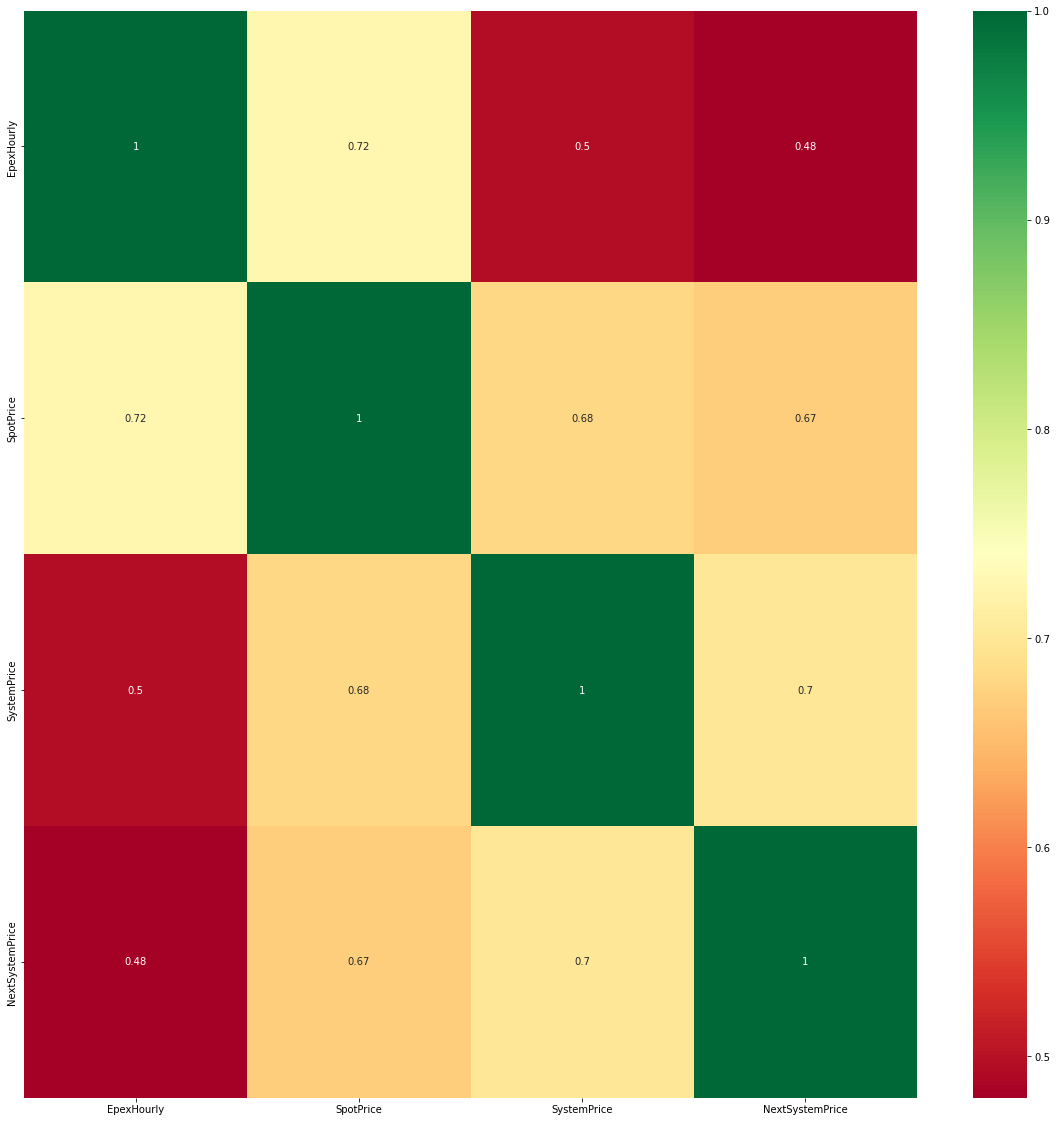

In [62]:
import seaborn as sns

data = df[["EpexHourly", "SpotPrice", "SystemPrice","NextSystemPrice"]]
X_cor = data.iloc[:,[0,1,2]]  #independent columns
y_cor = data.iloc[:,3]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 3. More feature preparation 

### i.Make seperate columns for year, month, day

In [63]:
dates = df["Date"]
day = []
month = []
year = []

for i in range(len(dates)):
    day += [int(dates[i][0:2])]
    month += [int(dates[i][3:5])]
    year += [int(dates[i][6:10])]

##### Remove date column and add these as columns

In [64]:
df.drop("Date",axis=1,inplace=True)
df["Day"] = day
df["Month"] = month
df["Year"] = year
df.head(1)

,Period,EpexHourly,SpotPrice,SystemPrice,ImbalanceVolume,Temp,NextSystemPrice,Day,Month,Year
0,1,33.41,40.45,52.25,195.4258,9.0,51.9,8,4,2019


##### Reorder columns

In [65]:
df = df[['Year', 'Month','Day', 'Period', 'EpexHourly', 'SpotPrice', 'SystemPrice', 'ImbalanceVolume',
       'Temp', 'NextSystemPrice']]
df.head(1)

,Year,Month,Day,Period,EpexHourly,SpotPrice,SystemPrice,ImbalanceVolume,Temp,NextSystemPrice
0,2019,4,8,1,33.41,40.45,52.25,195.4258,9.0,51.9


### iii. Scale Non-Date Data with Standard Scaler

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [67]:
scaled_features = df.copy()
col_names = ["Period","EpexHourly","SpotPrice","SystemPrice","ImbalanceVolume","Temp"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [68]:
scaled_features[col_names] = features
scaled_features.head()

,Year,Month,Day,Period,EpexHourly,SpotPrice,SystemPrice,ImbalanceVolume,Temp,NextSystemPrice
0,2019,4,8,-1.696335,-0.456000,-0.299587,-0.099008,0.541768,-0.655357,51.90
1,2019,4,8,-1.624150,-0.456000,-0.251954,-0.102586,0.129043,-0.655357,32.76
2,2019,4,8,-1.551966,-0.340170,-0.216082,-0.298251,-0.190300,-0.655357,50.85
3,2019,4,8,-1.479781,-0.340170,-0.247985,-0.113320,0.006459,-0.655357,51.40
4,2019,4,8,-1.407597,-0.371028,-0.242104,-0.107698,0.514135,-0.655357,50.85


### ii.Seperate features and labels

In [69]:
x_df = df.drop("NextSystemPrice",axis=1)
y_df = df["NextSystemPrice"].to_frame()

In [70]:
x_df.info()
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47184 entries, 0 to 47183
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             47184 non-null  int64  
 1   Month            47184 non-null  int64  
 2   Day              47184 non-null  int64  
 3   Period           47184 non-null  int64  
 4   EpexHourly       47184 non-null  float64
 5   SpotPrice        47184 non-null  float64
 6   SystemPrice      47184 non-null  float64
 7   ImbalanceVolume  47184 non-null  float64
 8   Temp             47184 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47184 entries, 0 to 47183
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NextSystemPrice  47183 non-null  float64
dtypes: float64(1)
memory usage: 368.8 KB


##### Fill in NAN Data in labels

In [71]:
y_df.fillna(value= y_df["NextSystemPrice"].median(),inplace=True)

In [72]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47184 entries, 0 to 47183
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NextSystemPrice  47184 non-null  float64
dtypes: float64(1)
memory usage: 368.8 KB


### iv.Correlation matrix for whole dataframe

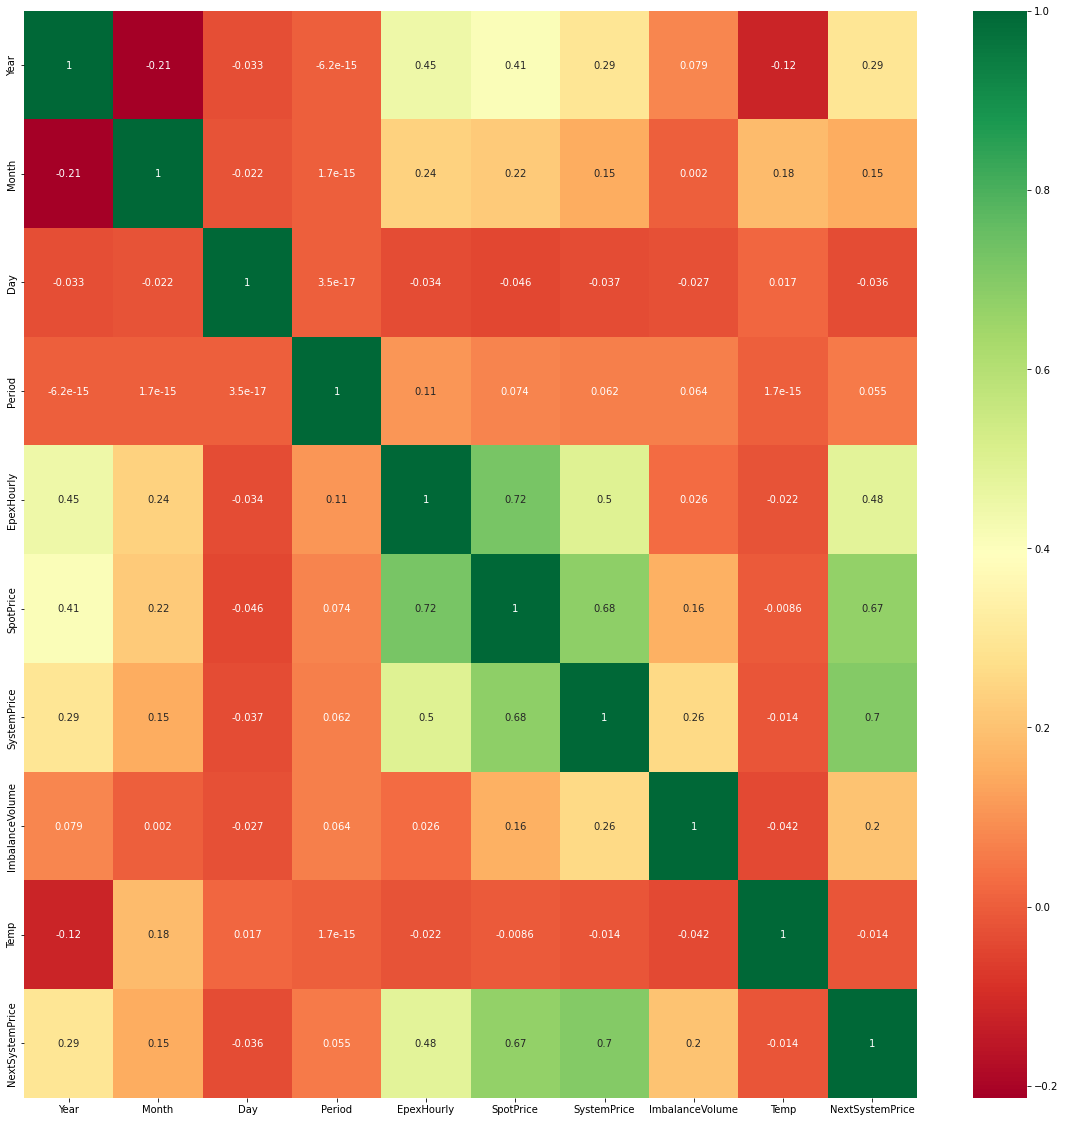

In [73]:
data = df
X_cor = data.iloc[:,[0,1,2,3,4,5,6]]  #independent columns
y_cor = data.iloc[:,7]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

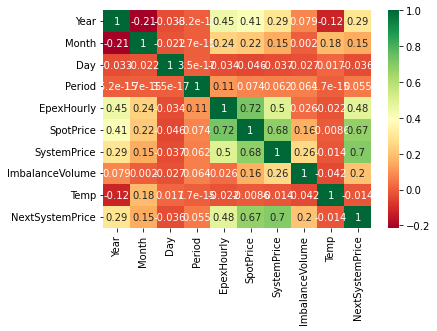

In [74]:
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### iv. Split into test train sets

In [75]:
X = x_df.to_numpy()
Y = y_df.to_numpy()

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Save these as csv

In [77]:
np.save("X_train",X_train)
np.save("Y_train",Y_train)
np.save("X_test",X_test)
np.save("Y_test",Y_test)

# 4.Apply ML

##  i.Run Linear Regression Model

##### Fit Model

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

##### Import metric and calculate mse

In [79]:
from sklearn.metrics import mean_squared_error
Y_train_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, Y_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

63.45598190685875

Very poor performance

In [80]:
lin_reg.coef_

array([[ 3.43013732,  0.56431462, -0.02091173, -0.02068829,  0.02512883,
         0.47360038,  0.4084637 ,  0.01299131, -0.06292201]])

Test with test set

In [81]:
Y_test_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(Y_test, Y_test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70.42201410659071

#### Plot 

In [82]:
np.shape(Y_test)

(9437, 1)

In [83]:
np.shape(Y_test_predictions)

(9437, 1)

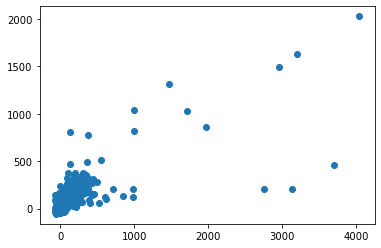

In [84]:
plt.scatter(Y_test,Y_test_predictions)

In [89]:
from sklearn.metrics import confusion_matrix

In [103]:
confusion_matrix(y_test_boolean,y_pred_boolean.ravel())

ValueError: Found input variables with inconsistent numbers of samples: [9437, 89056969]

In [99]:
y_test_boolean = Y_test > 0
y_pred_boolean = Y_test_predictions < Y_test

In [100]:
y_test_boolean

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [101]:
y_pred_boolean.ravel()

array([[False, False, False, ..., False, False, False],
       [ True,  True, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       [ True,  True, False, ...,  True,  True,  True]])

Performance slightly worse on test set

May need regularization

## ii.Decision Tree 

##### Fit Model

In [85]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

##### Check accuracy

In [86]:
Y_train_predictions = tree_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, Y_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

1.7253915896639927e-31

Very accurate, probably overfitting

In [87]:
Y_test_predictions = tree_reg.predict(X_test)
lin_mse = mean_squared_error(Y_test, Y_test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

11298.020174981186

Amazing overfitting

### Recommendations for further work to improve predictive model

Check correlation matrix

In [88]:
current_df = scaled_features.copy()
current_df.corr()["NextSystemPrice"]

Year               0.293842
Month              0.149871
Day               -0.036445
Period             0.054674
EpexHourly         0.480247
SpotPrice          0.669682
SystemPrice        0.701325
ImbalanceVolume    0.202676
Temp              -0.014357
NextSystemPrice    1.000000
Name: NextSystemPrice, dtype: float64

- Above matrix suggest we need to drop day and possibly temperature

- This is likely because the day of month does not hold any important informaiton not contained in the month column, and temperature is not a good predictor of solar output, 

- Will need to add datapoints that provide information on solar irradiation, cloudiness, and wind speed, ideally in the form of forecasts for the next 30 mins

- May have to timeshift the EPEX Prices to get a more relevant metric

- Although year seems like a relevant metric, the ups and downs in energy prices in the past three years may be peculiar and may cause overfitting when predicting future years

- Need to apply regularization to the ML model

- May add interaction terms

- May try more complicated ML methods than regression, and less complicated ones than decision trees ( or at least a regularized decision tree)